# IMPORTS

In [1]:
# \\  -------- IMPORTS -------- //

from ast import Return
from codecs import getdecoder
from pkgutil import get_data
from typing import List
from unicodedata import name
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

#import backtrader as bt
#import talib

# cyclical imports
from statsmodels.tsa.filters.hp_filter import hpfilter


# for outliers in data cleaning
from scipy import stats

# Data API
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

df = 0
df1 = 0

end = dt.datetime.now()  # end date is now
start = dt.datetime(1980, 1, 1)   # start date 

# IMPORT DATA

In [12]:
# economic metrics from FRED Data

riskfreerate = ['DGS3MO'] # 3 month t bills

# US
USGDP = ['GDP'] # GDP QUARTERLY 
USGDPYOY = ['GDPA'] # GDP ANNUAL
USGDPQQ = ['A191RL1Q225SBEA'] # USGDPQQ
USCPI = ['CPIAUCSL'] # CPI monthly
USCPIMM = ['CORESTICKM159SFRBATL'] # CPI MOM
USUR = ['U2RATE'] # UNEMP monthly

USINTR = ['DFF'] # US INTEREST RATE

Economiclist = riskfreerate + USGDP + USGDPYOY + USGDPQQ + USCPI + USCPIMM + USUR + USINTR


df2_quarterly = pdr.get_data_fred(Economiclist, start, end)



<AxesSubplot:xlabel='DATE'>

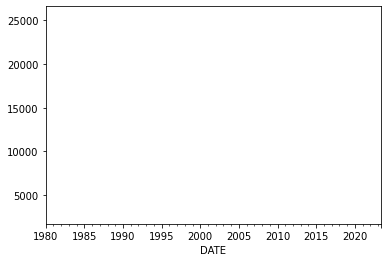

In [13]:
df2_quarterly['GDPA'].plot()

# CLEAN DATA

In [14]:
# clean the economic data

result_eco = df2_quarterly.asfreq('D')

result_eco = result_eco.interpolate(method = 'linear') # fill gaps to the correct frequency

result_eco = result_eco.fillna(method = 'ffill')

result_eco = result_eco.fillna(method = 'backfill')

result_eco = result_eco[(np.abs(stats.zscore(result_eco)) < 10).all(axis=1)] # remove any extreme outliers

# drop duplicate columns
result_eco = result_eco.loc[:, ~result_eco.columns.duplicated()]

<AxesSubplot:xlabel='DATE'>

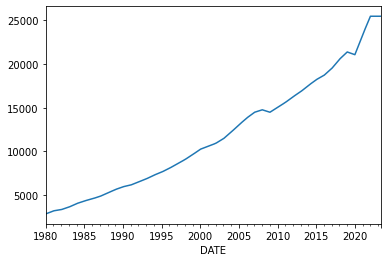

In [18]:
result_eco['GDPA'].plot()

In [19]:
# process to get GDP YOY

USGDPYoY = result_eco['GDPA'].asfreq('Y')

# transform to yearly data 

# pct_change

# transform to daily data

# clean data

In [27]:
USGDPYoY.pct_change() * 100



DATE
1980-12-31          NaN
1981-12-31     4.283383
1982-12-31     8.668637
1983-12-31    11.099300
1984-12-31     7.473002
1985-12-31     5.551117
1986-12-31     6.016379
1987-12-31     7.847085
1988-12-31     7.737327
1989-12-31     5.705017
1990-12-31     3.276135
1991-12-31     5.874694
1992-12-31     5.189183
1993-12-31     6.247441
1994-12-31     4.841047
1995-12-31     5.670425
1996-12-31     6.246818
1997-12-31     5.658861
1998-12-31     6.269692
1999-12-31     6.434724
2000-12-31     3.237023
2001-12-31     3.280704
2002-12-31     4.821018
2003-12-31     6.635584
2004-12-31     6.728054
2005-12-31     5.956184
2006-12-31     4.770476
2007-12-31     2.049612
2008-12-31    -1.964837
2009-12-31     3.926700
2010-12-31     3.660539
2011-12-31     4.192500
2012-12-31     3.626643
2013-12-31     4.198907
2014-12-31     3.735189
2015-12-31     2.689147
2016-12-31     4.180183
2017-12-31     5.416971
2018-12-31     4.132881
2019-12-31    -1.484195
2020-12-31    10.671531
2021-12-31 

<AxesSubplot:xlabel='DATE'>

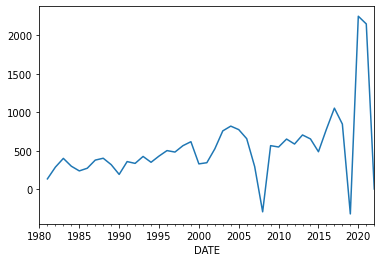

In [26]:
USGDPYoY.diff().plot()

# IMPORT ASSETS

In [4]:
# import asset data
data = yfin.download(("SPY", 'DX-Y.NYB', 'CL=F', 'GBPUSD=X'), start="1980-01-01", end= dt.datetime.now())

data_1 = pd.DataFrame(data["Close"])

# clean the data

df_asset = data_1.asfreq('D')

df_asset = df_asset.interpolate(method = 'linear') # fill gaps to the correct frequency

df_asset = df_asset.fillna(method = 'ffill')

df_asset = df_asset.fillna(method = 'backfill')

df_asset = df_asset[(np.abs(stats.zscore(df_asset)) < 10).all(axis=1)] # remove any extreme outliers

[*********************100%***********************]  4 of 4 completed


# JOIN DATA

In [ ]:
#joining economic and asset data
data = pd.concat([result_eco, df_asset], axis = 1)

data = data.fillna(method = 'ffill')

data = data.fillna(method = 'backfill')


# SET QUADS AND CRITERIA

DATE
2023-04-27    1.1
Freq: D, Name: A191RL1Q225SBEA, dtype: float64


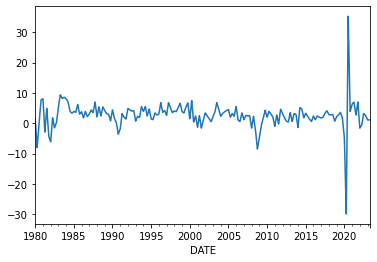

In [8]:
result_eco['A191RL1Q225SBEA'].plot()
print(result_eco['A191RL1Q225SBEA'].tail(1))

# FIND BEST AND WORST PERFOMING ASSET IN CURRENT ENVIRONMENT

## CALCULATE THROUGH EACH ASSET

In [ ]:
# AVG DAILY RETURN
# SHARPE RATIO
# CALMARO RATIO